# livelossplot example: PyTorch Poutyne

Last update: `livelossplot 0.5.3`. For code and documentation, see [livelossplot GitHub repository](https://github.com/stared/livelossplot).

<a href="https://colab.research.google.com/github/stared/livelossplot/blob/master/examples/poutyne.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

[Poutyne](https://poutyne.org/) is a Keras-like framework for [PyTorch](https://pytorch.org/) and handles much of the boilerplating code needed to train neural networks.

You can use Poutyne to:
- Train models easily.
- Use callbacks to save your best model, perform early stopping and much more.

See more at [poutyne.org](https://poutyne.org/). In this notebook, we show how to use `livelossplot` with Poutyne.

In [ ]:
!pip install poutyne livelossplot --quiet

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.init import xavier_normal_

from torchvision import transforms
from torchvision.datasets.mnist import MNIST

from pkg_resources import parse_version
import poutyne
assert parse_version(poutyne.__version__) >= parse_version('1.0.0'), "Please update your Poutyne version."

from poutyne import Model

from livelossplot import PlotLossesPoutyne

In [2]:
# data loading
train_dataset = MNIST('./tmp/mnist/', 
                      train=True, 
                      download=True, 
                      transform=transforms.ToTensor())
test_dataset = MNIST('./tmp/mnist/', 
                     train=False, 
                     download=True, 
                     transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [3]:
# initialization function
def init_module(module):
    for m in module.modules():
        if isinstance(m, nn.Linear):
            xavier_normal_(m.weight.data, 1)
            m.bias.data.zero_()

In [4]:
# defining model
torch.manual_seed(42)
module = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 10),
)
init_module(module)

optimizer = optim.Adam(module.parameters(), lr=1e-3)
model = Model(module, 
              optimizer, 
              nn.CrossEntropyLoss(), 
              batch_metrics=['accuracy'])

if torch.cuda.is_available():
    model.cuda()

In [5]:
# setting up the livelossplot callback
plotlosses = PlotLossesPoutyne()

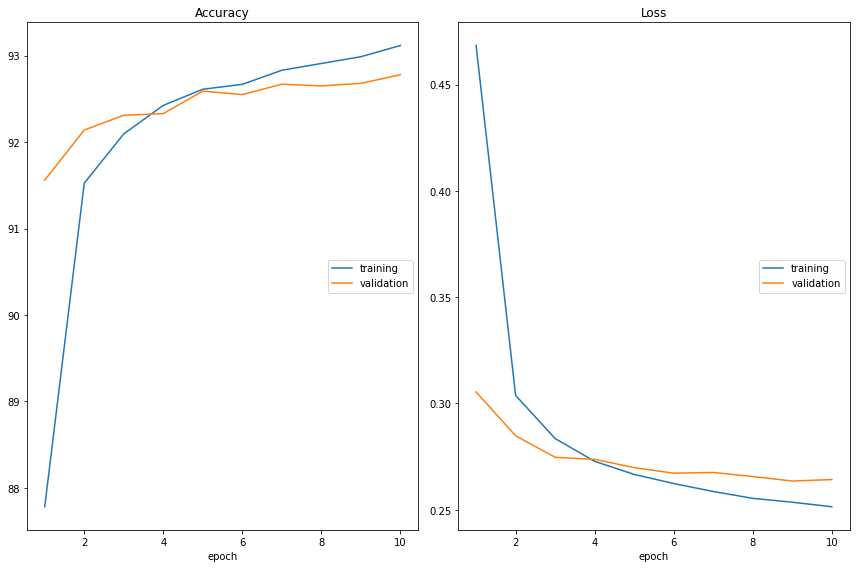

Accuracy
	training         	 (min:   87.780, max:   93.118, cur:   93.118)
	validation       	 (min:   91.560, max:   92.780, cur:   92.780)
Loss
	training         	 (min:    0.251, max:    0.468, cur:    0.251)
	validation       	 (min:    0.264, max:    0.305, cur:    0.264)


In [6]:
# fitting the model
history = model.fit_generator(train_loader, test_loader,
                              epochs=10,
                              callbacks=[plotlosses],
                              verbose=False)